<h1>Writing Like Shakespeare using Deep Learning</h1>
-Kashish
<h3>Problem Statement</h3>
We have a collection of Shakespeare' Sonnets, we want to build a Deep Learning System using a deep Recurrent Neural Network with a combination of Bidirectional-LSTMs and LSTMs that could help us generate similar poems.

<h3>Real-world/Business-objectives and constraints:</h3>

1. Minimize multi-class error.
2. Multi-class probability estimates.
3. Generating output should not take hours and block system resources. It should be efficient enough to work in a few seconds.

* All necessary imports are made when required and specific functions/attributes only.

<h3>Collecting the Data</h3>
<h4>Data</h4>

Our dataset contains a collection of Shakespeare' Sonnets, downloaded from the following link :
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt

<h4>Data Sample</h4>

Shall sum my count and make my old excuse,'
Proving his beauty by succession thine!
This were to be new made when thou art old,
And see thy blood warm when thou feel'st it cold.
Look in thy glass, and tell the face thou viewest
Now is the time that face should form another;
Whose fresh repair if now thou not renewest,
Thou dost beguile the world, unbless some mother.
For where is she so fair whose unear'd womb
Disdains the tillage of thy husbandry?

In [9]:
!wget --no-check-certificate \ https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \ -O sonnets.txt 

--2022-01-29 14:24:04--  http://%5C/
Resolving \\ (\\)... failed: No such host is known. .
wget: unable to resolve host address '\\'
--2022-01-29 14:24:04--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.196.208, 142.250.194.80, 142.250.194.48, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.196.208|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: 'sonnets.txt'

     0K .......... .......... .......... .......... .......... 54%  376K 0s
    50K .......... .......... .......... .......... .         100%  407K=0.2s

2022-01-29 14:24:05 (389 KB/s) - 'sonnets.txt' saved [93578/93578]

--2022-01-29 14:24:05--  http://%5C/
Resolving \\ (\\)... failed: No such host is known. .
wget: unable to resolve host address '\\'
FINISHED --2022-01-29 14:24:05--
Total wall 

<h4>Exploratory data Analysis</h4>

In [7]:
#read the dataset
from tensorflow import data

dataset=data.TextLineDataset(['sonnets.txt'])

In [14]:
from tensorflow import data
dataset=data.TextLineDataset('sonnets.txt')

#count no. of lines in the dataset
raw_data=[element.decode('utf-8') for element in dataset.as_numpy_iterator()]
print('Number of lines in dataset: %s'%len(raw_data))

from tensorflow.keras.preprocessing.text import Tokenizer
#count no. of unique words in dataset
tokenizer=Tokenizer()
tokenizer.fit_on_texts(raw_data)
print('Number of unique words in dataset: %s'%len(tokenizer.word_index))
#find max and min no. of words in a sentence
tokenized_data=tokenizer.texts_to_sequences(raw_data)
lines_length=[len(sequence) for sequence in tokenized_data if len(sequence)>1]
print('Max number of words in a sentence: {}\nMin number of words in a sentence: {}'.format(max(lines_length),min(lines_length)))


Number of lines in dataset: 2158
Number of unique words in dataset: 3210
Max number of words in a sentence: 11
Min number of words in a sentence: 5


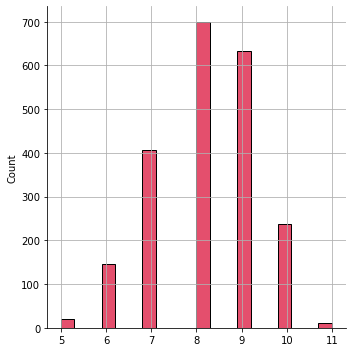

In [52]:
#plot a graph
from seaborn import displot
from pandas import DataFrame
from matplotlib.pyplot import grid

temp_df=DataFrame({'n_lines':lines_length})
temp_df=temp_df.n_lines.value_counts().reset_index()
displot(lines_length,kind='hist',color='crimson',aspect=1,height=5)
grid(True)
